<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/NVL_RNN_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv
df = pd.read_csv('NVL-Data.csv')
df

,Date,Price
0,2017-01-03,25055.00
1,2017-01-04,25225.00
2,2017-01-05,25097.00
3,2017-01-06,25140.00
4,2017-01-07,25129.25
...,...,...
2702,2024-05-28,14500.00
2703,2024-05-29,14150.00
2704,2024-05-30,14150.00
2705,2024-05-31,14450.00


In [3]:
df1=df.reset_index()['Price']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
test_data

array([[0.13578353],
       [0.14065468],
       [0.1382191 ],
       [0.14309026],
       [0.13943689],
       [0.13943689],
       [0.12482342],
       [0.13030347],
       [0.11812558],
       [0.10290321],
       [0.10533879],
       [0.11629889],
       [0.11629889],
       [0.09620537],
       [0.08585416],
       [0.10046763],
       [0.09681426],
       [0.08707195],
       [0.09328267],
       [0.09328267],
       [0.07245847],
       [0.05967168],
       [0.06393395],
       [0.06697842],
       [0.06515174],
       [0.06563885],
       [0.06563885],
       [0.06271616],
       [0.04992937],
       [0.05297384],
       [0.04323153],
       [0.04444932],
       [0.05066004],
       [0.05066004],
       [0.04992937],
       [0.04810268],
       [0.05114716],
       [0.05601832],
       [0.05723611],
       [0.05248673],
       [0.05248673],
       [0.05236495],
       [0.04262263],
       [0.03348921],
       [0.03592479],
       [0.04323153],
       [0.04152662],
       [0.041

In [8]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [11]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 [==============================] - 4s 57ms/step - loss: 0.0349 - val_loss: 4.2173e-04
Epoch 2/100
37/37 [==============================] - 1s 40ms/step - loss: 7.4112e-04 - val_loss: 1.7369e-04
Epoch 3/100
37/37 [==============================] - 2s 45ms/step - loss: 5.3139e-04 - val_loss: 1.5150e-04
Epoch 4/100
37/37 [==============================] - 2s 42ms/step - loss: 4.8293e-04 - val_loss: 1.3743e-04
Epoch 5/100
37/37 [==============================] - 2s 42ms/step - loss: 4.5258e-04 - val_loss: 1.1275e-04
Epoch 6/100
37/37 [==============================] - 2s 45ms/step - loss: 4.2046e-04 - val_loss: 1.4297e-04
Epoch 7/100
37/37 [==============================] - 2s 44ms/step - loss: 3.8750e-04 - val_loss: 9.3190e-05
Epoch 8/100
37/37 [==============================] - 2s 41ms/step - loss: 3.9146e-04 - val_loss: 1.0013e-04
Epoch 9/100
37/37 [==============================] - 1s 40ms/step - loss: 3.5681e-04 - val_loss: 1.0886e-04
Epoch 10/100
37/37 [============

In [13]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 7ms/step


In [14]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

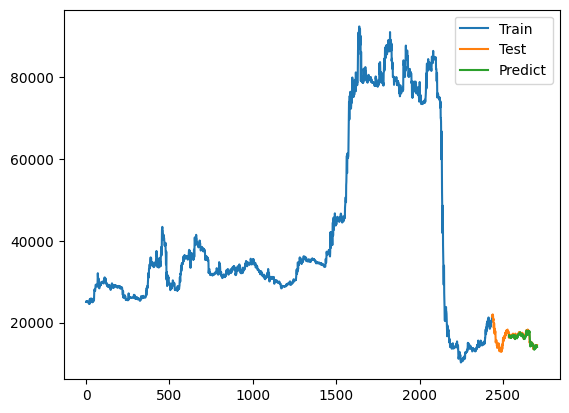

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [16]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [17]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 408.83069770578334
MAE: 313.1778191259863
MAPE: 0.01929013258382387


In [18]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 29ms/step


In [19]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 27ms/step


In [20]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 176ms/step


In [21]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[13467.73034436],
       [13183.14727372],
       [12991.22770034],
       [12596.61148737],
       [12317.03701466],
       [11923.48122463],
       [11873.76493271],
       [11514.83654773],
       [11456.81468015],
       [11090.0871468 ],
       [10866.92792368],
       [10123.92805638],
       [10183.28589167],
       [ 9748.77403806],
       [ 9626.47406761],
       [ 9265.73663139],
       [ 8931.8350995 ],
       [ 8360.99901772],
       [ 7972.30024922],
       [ 7658.68119875],
       [ 7344.76021911],
       [ 7104.30897455],
       [ 6690.56385146],
       [ 6398.34750995],
       [ 6108.15167716],
       [ 5752.7798311 ],
       [ 5410.0789149 ],
       [ 5069.36302233],
       [ 4756.49588865],
       [ 4320.94579029]])

In [22]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


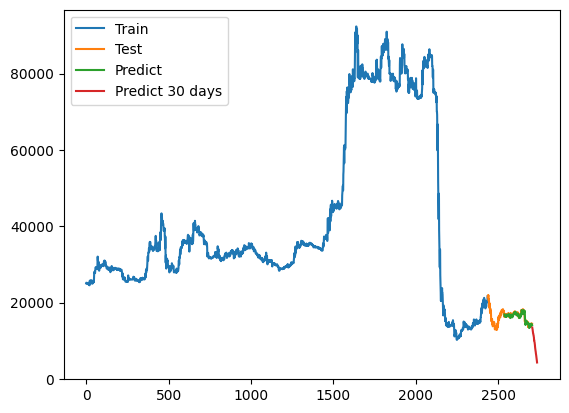

In [23]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



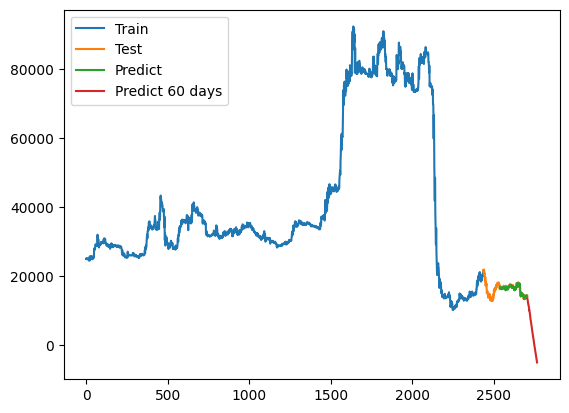

In [24]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



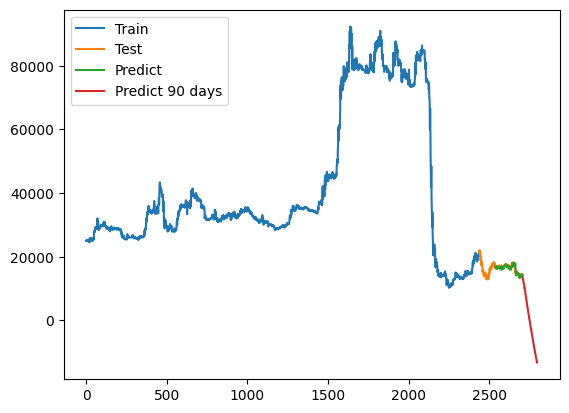

In [25]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

